# Diferenciální rovnice druhého řádu


Budeme studovat jednorozměrnou difuzní rovnici se spotřebiči úměrnými stavové veličině a v homogenním prostředí, tj. rovnici $$\frac{\partial u}{\partial t}=-ku+D\frac{\partial ^2u}{\partial x^2},\tag{1}$$ kde $k$ a $D$ jsou konstanty. 

* Model odpovídá například **rozložení teploty v tyči**, kde se teplo předává do okolí rychlostí úměrnou teplotě. Tato úlohaj edůležitá z technického hlediska, protože modeluje například žebro chladiče v jednodimenzionálním přiblížení, viz Spakovskzy (2007). 
* V systémové a vývojové biologii tato rovnice popisuje **morfogen**. Tato úloha je důležitá z hlediska pochopení vývoje zárodku ze shluku stejných zárodečných buněk na buňky jednotlivých tkání. Morfogen je transkripční faktor, který je uložen na určitém místě embrya vyvíjejícího se živočicha, šíří se prostředím a degraduje. Z gradientu kocentrace dvou morfogenů zárodečné buňky poznají svou polohu v embryu. Poznají tím, na buňky jaké tkáně se mají přeměnit. Viz Doležal (2021) a Wartlick(2009).
* Jiný model, který nás přivede ke stejné rovnici, je model **difuze radonu**. Tento model je důležitý pro ochranu zdraví, protože radon jako radioaktivní těžký plyn vníká do budov, kumuluje se ve sklepích nebo v přízemí a v oblastech se zvýšeným rizikem je jedním z nejzávažnějších spouštěčů rakoviny plioc. Jako každý radioaktivní materiál, i radon se rozpadá rychlostí úměrnou množství tohoto prvku. Difuzní rovnice se započítáním konstantních zdrojů (prvky, ze kterých radon vzniká, mají dlouhý poločast rozpadu a na časové škále, na které studujedme změny koncentrace radonu, je jejich množství prakticky konstantní) je $$\frac{\partial u}{\partial t}=P-ku+D\frac{\partial ^2u}{\partial x^2}$$ a pokud uvažujeme asociovanou homogenní rovnici, dostáváme rovnici (1). Více viz Ishimori (2013).

Budeme hledat stacionární řešení, tj. rovnice (1) se zjednoduší na rovnici
$$-ku+D\frac{\mathrm d ^2u}{\mathrm d x^2}=0.$$
Jedná se o diferenciální rovnici druhého řádu s konstantními koeficienty. Obecným řešením této rovnice je funkce 
$$ u=C_1 e^{-\sqrt{\frac{k}D}x}+C_2e^{\sqrt{\frac{k}D}x}.$$
My se budeme snažit tuto rovnici vyřešit společně s okrajovými podmínkami. To se dá udělat i analyticky, pokusíme se však o numerické řešení.

Knohovna SciPy vyžaduje přepsat rovnici vyššího řádu na systém rovnic prvního řádu. Naši rovnici je možno přepsat na systém
$$\begin{aligned}\frac{\mathrm d u}{\mathrm d x}&=v\cr
\frac{\mathrm d v}{\mathrm d x}&=\frac{k}{D}u.\end{aligned}$$


In [1]:
import numpy
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(X, Y):
    global k,D       # konstanty k a D použijeme globální
    u,v = Y          # identifikace komponent řešení
    return numpy.vstack((v, (k)/D*u))  # pravé strany rovnic jako sloupcový vektor

x = numpy.linspace(0, 1, 15)
y = numpy.zeros((2, x.size))
x_plot = numpy.linspace(0, 1, 100)   # interval pro kreslení grafu na 100 dílků

## Smíšená okrajová úloha


Budeme uvažovat okrajové podmínky $u(0)=100$ a $\frac{\mathrm du}{\mathrm dx}(1)=0.$ Okrajové podmínky vyjadřují, že levý konec je udržován na konstantní teplotě a pravý konec neodevzdává teplo do okolí. Pro systém je můžeme přepsat do tvaru $$\begin{aligned}u(a)-100&=0\cr v(1)&=0.\end{aligned}$$ Pro $k=0$ se jedná o vedení tepla v homogenním prostředí bez spotřebičů a očekáváme konstantní profil. Pro $k>0$ je podél tyče předáváno teplo do okolí a teplota klesá. Podle velikosti koeficientu $k$ klesne teplota na pravém konci hodně nebo málo. Větší hodnota $k$ vede ze zkušeností k rychlejšímu poklesu teploty.

Jiný model, který nás přivede ke stejné rovnici, je model difuze radonu, který se rozpadá rychlostí úměrnou množství tohoto prvku.

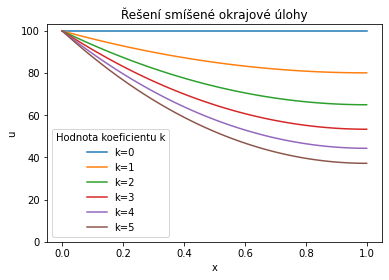

In [7]:
D=1  # Důležitý je podíl k/D. Proto D volíme konstantní a měníme jenom k.

def bc2(Ya, Yb):  # definice okrajových podmínek
    # Ya je řešení v levém krajním bodě
    # Ya[0] je první komponenta tohoto řešení, tj. u
    # v levém bodě je u=100, tj. nuluje se funkce Ya[0]-100
    # Yb je řešení v pravém krajním bodě
    # Yb[1] je druhá komponenta tohoto řešení, tj. v, což je du/dx
    # v pravém bodě je du/dx=0, tj. nuluje se funkce Yb[1]
    return numpy.array([Ya[0]-100, Yb[1]])

for k in (0,1,2,3,4,5):
    sol = solve_bvp(fun, bc2, x, y)     # vyřešení rovnice pro danou hodnotu parametru
    y_plot = sol.sol(x_plot)[0]         # výpočet bodů pro vykreslení řešení
    plt.plot(x_plot, y_plot, label = "k=%s"%k)  # vykreslení řešení
    
plt.xlabel("x")  # popisky na osách
plt.ylabel("u")
plt.ylim(0)      # dolní mez na svislé ose
plt.legend(title="Hodnota koeficientu k")  # legenda, včetně nadpisu
plt.title("Řešení smíšené okrajové úlohy") # nadpis grafu
plt.show()

## Dirichletova okrajová úloha

Budeme uvažovat okrajové podmínky $u(0)=100$ a $u(1)=0.$ Tyto podmínky vyjadřují, že oba konce jsou udržovány na konstantní teplotě, každý na jiné. Pro $k=0$ se jedná o vedení tepla v homogenním prostředí a očekáváme lineární profil. Pro $k>0$ je podél tyče předáváno teplo do okolí a teplota klesá rychleji.



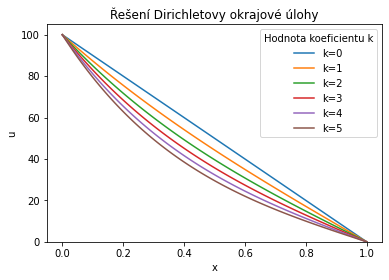

In [3]:
D=1

def bc(Ya, Yb):  # Okrajové podmínky
    return numpy.array([Ya[0]-100, Yb[0]])

for k in (0,1,2,3,4,5):
    sol = solve_bvp(fun, bc, x, y)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label = "k=%s"%k)
    
plt.xlabel("x")
plt.ylabel("u")
plt.ylim(0)
plt.legend(title="Hodnota koeficientu k")
plt.title("Řešení Dirichletovy okrajové úlohy")
plt.show()

## Nekonstantní součinitel tepelné vodivosti

Popsanou analýzu můžeme udělat i s nekonstantním součinitelem tepelné vodivosti $D$, což by se nám v obecném případě provádělo již hůře. Stacionární rovnice je 
$$-kT+\frac{\mathrm d }{\mathrm d x}\left(D\frac{\mathrm d T}{\mathrm d x}\right)=0.$$
Například pokud součinitel tepelné vodivosti s teplotou roste, očekáváme při větší teplotě intenzivnější předávání tepla a tedy i menší teplotní rozdíly. Proto by pro velké teploty křivka neměla klesat tak rychle. Vyjde to z modelu? 

Soustava rovnic ekvivalentní této rovnici je po označení $u=T$ a $\displaystyle v=D\frac{\mathrm d T}{\mathrm d x}$ ve tvaru
$$\begin{aligned}\frac{\mathrm d u}{\mathrm d x}&=\frac 1D v\cr
\frac{\mathrm d v}{\mathrm d x}&=ku.\end{aligned}$$


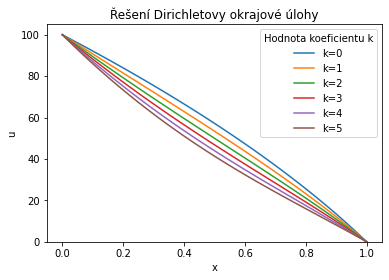

In [4]:
def fun(X, Y):
    global k         # konstantu k použijeme globální
    u,v = Y          # identifikace komponent řešení
    return numpy.vstack((1/(1.2+0.01*u)*v, (k)*u))  # pravé strany rovnic jako sloupcový vektor
    # soucinitel vodivosti roste s teplotou u podle vzorce 1.2+0.01*u

def bc(Ya, Yb):  # Okrajové podmínky
    return numpy.array([Ya[0]-100, Yb[0]])

for k in (0,1,2,3,4,5):
    sol = solve_bvp(fun, bc, x, y)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot, label = "k=%s"%k)
    
plt.xlabel("x")
plt.ylabel("u")
plt.ylim(0)
plt.legend(title="Hodnota koeficientu k")
plt.title("Řešení Dirichletovy okrajové úlohy")
plt.show()

## Literatura

1. Tomáš Doležal: Vývojová biologie, online [https://www.prf.jcu.cz/zmb/menu/vyvojova-biologie.html](https://www.prf.jcu.cz/zmb/menu/vyvojova-biologie.html) (2.4.2021)
1. Y. Ishimori, K. Lange, P. Martin,  Y.S. Maya, M. Phaneuf: Measurement and calculation of radon releases from NORM residues, 
Vienna:  International atomic energy agency, 2013. ISBN 978–92–0–142610–9. online [https://www-pub.iaea.org/MTCD/Publications/PDF/trs474_webfile.pdf](https://www-pub.iaea.org/MTCD/Publications/PDF/trs474_webfile.pdf) (4.4.2021)
1. Zoltán Spakovskzy: Heat Transfer From a Fin (2007) online [https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node128.html](https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node128.html) (4.4.2021)
1. Ortrud Wartlick, Anna Kicheva, Marcos González-Gaitán: Morphogen Gradient Formation, Cold Spring Harb Perspect Biol. 2009 Sep; 1(3): a001255. doi: 10.1101/cshperspect.a001255 [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2773637/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2773637/) (2.4.2021)

